In [1]:
import pennylane as qml
from pennylane import numpy as np

In [12]:
device = qml.device("default.qubit", wires = 1)

@qml.qnode(device)
def circuit():

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 0)

    return qml.state()

In [14]:
print(circuit())
# This is to show that there is some kind of symmetry between the standard compuational basis and the Hadamard basis. Here we first apply a PauliX to the |0> state
# which flips the state to |1>, then applied a hadamard gate which is also a basis change operator to the Hadamard basis. 
# The final state is thus |-> in the Hadamard basis which is equivalent to applying a PauliZ gate to the |+> state.

[1.+0.j 0.+0.j]


In [15]:
def subcircuit_1(angle, wire_list):
    """
    Implements the first subcircuit as a function of the RX gate angle
    and the list of wires wire_list on which the gates are applied
    """
    qml.RX(angle, wires = wire_list[0])
    qml.PauliY(wires = wire_list[1])

def subcircuit_2(wire_list):
    """
    Implements the second subcircuit as a function of the list of wires 
    wire_list on which the gates are applied
    """

    qml.Hadamard(wires = wire_list[0])
    qml.CNOT(wires = wire_list)

dev = qml.device("default.qubit", wires = [0,1])

@qml.qnode(dev)
def full_circuit(theta, phi):
    """
    Builds the full quantum circuit given the input parameters
    """
    wire_list = [0,1]
    subcircuit_1(theta,  wire_list)
    subcircuit_2(wire_list)
    subcircuit_1(theta, wire_list[::-1])

    return qml.state()

C:\Users\amirf\AppData\Local\Temp\ipykernel_31352\1284009498.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


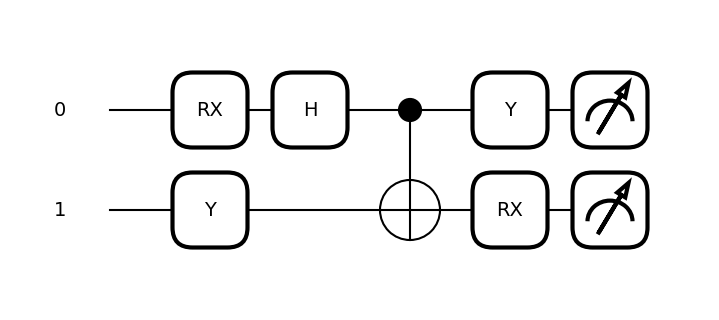

In [16]:
fig, ax = qml.draw_mpl(full_circuit)(np.pi/4, np.pi/2)
fig.show()